In [22]:
import numpy as np
from finetune_resnet import get_models, preprocess_images, preprocess_labels, market_attribute_accuracy
import h5py
import matplotlib.pyplot as plt

In [9]:
dataset = h5py.File("../Market-1501/market.h5", "r")
list(dataset)

['test_images',
 'test_images_files',
 'test_labels',
 'train_images',
 'train_images_files',
 'train_labels']

In [8]:
attribute_model, training_model, inference_model = get_models(n_person=751)
training_model.load_weights("../models/full-model-weights.h5")

In [29]:
x = dataset["test_images"]
attributes = dataset["test_labels"]
files = dataset["test_images_files"]

In [11]:
x.shape, attributes.shape, files.shape

((12692, 128, 64, 3), (12692, 27), (12692,))

In [24]:
attribute_model.compile("adam", "binary_crossentropy", metrics=[market_attribute_accuracy])
res = attribute_model.evaluate(preprocess_images(np.array(x)), preprocess_labels(np.array(attributes)))

12692/12692 [==============================] - 773s 61ms/step


In [27]:
print("accuracy:", res[0] * 100)

accuracy: 48.015630252722715


In [39]:
sample = x[:100:10]
res = attribute_model.predict(sample)

In [40]:
res.shape

(10, 27)

(0.16414222, 'age') (0.022947311, 'backpack') (0.002403468, 'bag') (0.9987298, 'clothes') (0.0015618205, 'down') (0.00544703, 'downblack') (0.8608382, 'downblue') (0.06065923, 'downbrown') (0.0022320151, 'downgray') (0.00071009994, 'downgreen') (0.00060236454, 'downpink') (0.003104806, 'downpurple') (0.18342882, 'downwhite') (0.000397712, 'downyellow') (0.020912409, 'gender') (0.0046016276, 'hair') (0.010372162, 'handbag') (0.0011900365, 'hat') (0.99332595, 'up') (0.002135992, 'upblack') (0.009017736, 'upblue') (0.02529326, 'upgray') (0.00027382374, 'upgreen') (0.0018995404, 'uppurple') (0.08491722, 'upred') (0.98704123, 'upwhite') (0.00037306547, 'upyellow')


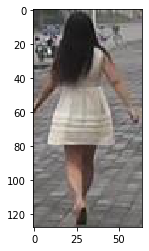

In [41]:
print(*zip(res[0], attributes.attrs["labels"]))
plt.imshow(sample[0] / 255.)

(0.13379195, 'age') (0.047201008, 'backpack') (0.013161063, 'bag') (0.9982059, 'clothes') (0.006483555, 'down') (0.012710452, 'downblack') (0.7096458, 'downblue') (0.11205, 'downbrown') (0.002507031, 'downgray') (0.0013436973, 'downgreen') (0.0011541545, 'downpink') (0.0031725466, 'downpurple') (0.42003077, 'downwhite') (0.0018841028, 'downyellow') (0.05732563, 'gender') (0.013628691, 'hair') (0.012717247, 'handbag') (0.0029035807, 'hat') (0.9861645, 'up') (0.0047858357, 'upblack') (0.009669989, 'upblue') (0.012664795, 'upgray') (0.0005685985, 'upgreen') (0.008441329, 'uppurple') (0.112311125, 'upred') (0.9775897, 'upwhite') (0.0010648668, 'upyellow')


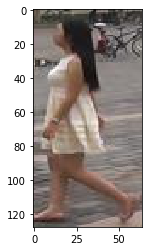

In [42]:
print(*zip(res[2], attributes.attrs["labels"]))
plt.imshow(sample[2] / 255.)

(0.09031436, 'age') (0.7939106, 'backpack') (0.010307103, 'bag') (0.9714087, 'clothes') (0.5391178, 'down') (0.45421442, 'downblack') (0.018692642, 'downblue') (0.05285719, 'downbrown') (0.040243775, 'downgray') (0.00085681677, 'downgreen') (0.001262635, 'downpink') (0.0004950464, 'downpurple') (0.018396705, 'downwhite') (0.00069382787, 'downyellow') (0.9723128, 'gender') (0.59262866, 'hair') (0.007961839, 'handbag') (0.022495776, 'hat') (0.99073243, 'up') (0.03513363, 'upblack') (0.025678188, 'upblue') (0.1079264, 'upgray') (0.00026845932, 'upgreen') (0.09166375, 'uppurple') (0.17906678, 'upred') (0.21508735, 'upwhite') (0.002895397, 'upyellow')


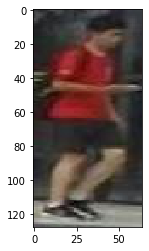

In [46]:
print(*zip(res[9], attributes.attrs["labels"]))
plt.imshow(sample[9] / 255.)

In [48]:
sample = x[:2000:2]
res = inference_model.predict(preprocess_images(np.array(sample)))

In [49]:
res.shape

(1000, 539)

In [50]:
images = files[:2000:2]
images.shape

(1000,)

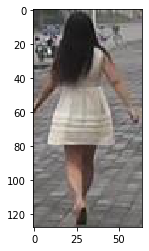

In [52]:
print("image query")
plt.imshow(sample[0] / 255.)

In [72]:
diff = res[1:] - res[0]
dist = np.linalg.norm(diff, axis=-1)
dist

array([13.763125 , 10.522835 , 20.252449 , 11.600293 , 21.055769 ,
       11.521099 , 14.966566 , 14.433875 , 14.856423 ,  7.945911 ,
        9.045347 , 14.372316 ,  6.319577 , 13.118673 , 17.186136 ,
       12.863197 , 13.245594 , 15.093685 , 12.899913 , 11.531569 ,
        8.676198 , 12.814387 , 10.37838  ,  9.288103 ,  9.392104 ,
       11.826959 , 11.997764 , 11.221489 ,  9.186253 , 20.428406 ,
       12.931495 , 15.8349085, 11.538669 , 15.1139145, 15.401139 ,
       20.109442 , 19.51346  , 30.871664 , 16.664549 , 20.478655 ,
       18.39438  , 18.247408 , 17.842602 , 21.861998 , 23.955969 ,
       22.81607  , 38.18956  , 28.802263 , 17.597925 , 35.01575  ,
       23.451674 , 26.895584 , 14.990366 , 21.088074 , 22.164476 ,
       18.417421 , 17.225832 , 27.406242 , 32.8496   , 25.720858 ,
       29.874973 , 31.97987  , 17.862919 , 13.664495 , 13.948647 ,
       11.976874 , 20.482014 , 15.523983 , 17.755615 , 13.652175 ,
       16.279531 , 15.655292 , 19.893103 ,  9.958024 , 11.8779

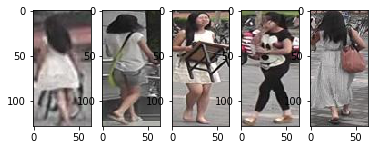

In [76]:
k = 5
ordered = np.argpartition(dist, k)[:k]
ordered
print("closest in gallery")
plt.subplot(151)
plt.imshow(sample[ordered[0]] / 255.)
plt.subplot(152)
plt.imshow(sample[ordered[1]] / 255.)
plt.subplot(153)
plt.imshow(sample[ordered[2]] / 255.)
plt.subplot(154)
plt.imshow(sample[ordered[3]] / 255.)
plt.subplot(155)
plt.imshow(sample[ordered[4]] / 255.)

furthest in gallery


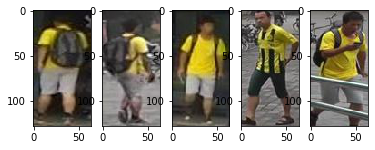

In [77]:
k = 5
ordered = np.argpartition(-dist, k)[:k]
ordered
print("furthest in gallery")
plt.subplot(151)
plt.imshow(sample[ordered[0]] / 255.)
plt.subplot(152)
plt.imshow(sample[ordered[1]] / 255.)
plt.subplot(153)
plt.imshow(sample[ordered[2]] / 255.)
plt.subplot(154)
plt.imshow(sample[ordered[3]] / 255.)
plt.subplot(155)
plt.imshow(sample[ordered[4]] / 255.)